# Social Progress Index vs. Style of Government


## Data Loading/Preprocessing

In [1]:
# imports
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
spiData = pd.read_csv('SPIData.csv')

In [3]:
spiData = pd.DataFrame(pd.concat([spiData['Country'],spiData['SPI year'],spiData['Social Progress Index']],axis=1))

In [4]:
# Making sure row is for 2020
for index, row in spiData.iterrows():
    if row['SPI year']!=2020:
        spiData.drop(index, inplace=True)

In [5]:
spiData = pd.DataFrame(pd.concat([spiData['Country'],spiData['Social Progress Index']],axis=1))

In [6]:
democracyData = pd.read_csv('DemocracyData.csv')

In [7]:
democracyData = pd.DataFrame(pd.concat([democracyData['name'],democracyData['time'],democracyData['Democracy index (EIU)']],axis=1))

In [8]:
# Making sure row is for 2020
for index, row in democracyData.iterrows():
    if row['time']!=2019:
        democracyData.drop(index, inplace=True)

In [9]:
democracyData = democracyData.drop(columns=['time'])

In [10]:
data = []
countries = []

In [11]:
for index, row in spiData.iterrows():
    country = row['Country']
    socialProgressIndex = row['Social Progress Index']

    for i, r in democracyData.iterrows():
        newCountry = r['name']
        democracyIndex = r['Democracy index (EIU)']

        if country==newCountry:
            countries.append([country])
            data.append([socialProgressIndex,democracyIndex])

In [12]:
X = pd.DataFrame(data)[0]
y = pd.DataFrame(data)[1]

## Data Visualization

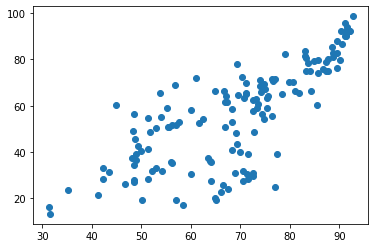

In [13]:
plt.scatter(X,y)

In [14]:
x = pd.DataFrame(data)

## KMeans Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [16]:
x = preprocessing.scale(x)

In [17]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, '# of cluster')

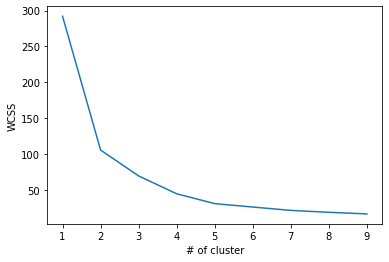

In [18]:
plt.plot(range(1,10),wcss)
plt.ylabel('WCSS')
plt.xlabel('# of cluster')

In [19]:
kmeans = KMeans(5)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_w_cluster = pd.DataFrame(x.copy())
data_w_cluster['Cluster'] = identified_clusters
data_w_cluster = data_w_cluster.rename(columns={0: "SPI", 1: "Democracy Index"})

data_w_cluster = pd.concat([data_w_cluster,pd.DataFrame(countries)],axis=1)

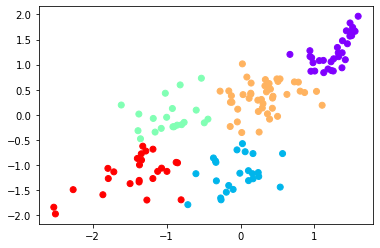

In [20]:
plt.scatter(data_w_cluster['SPI'],data_w_cluster['Democracy Index'],c=data_w_cluster['Cluster'],cmap='rainbow')

# 5 Groups/Clusters

In [21]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []

In [22]:
for i,r in data_w_cluster.iterrows():
    if r['Cluster']==0:
        group1.append(r[0])
    elif r['Cluster']==1:
        group2.append(r[0])
    elif r['Cluster']==2:
        group3.append(r[0])
    elif r['Cluster']==3:
        group4.append(r[0])
    elif r['Cluster']==4:
        group5.append(r[0])

## Group 1 - The Purple
#### Countries list: Australia Austria Belgium Canada Costa Rica Cyprus Denmark Estonia Finland France Germany Greece Chile Iceland Ireland Israel Italy Japan Latvia Lithuania Luxembourg Malta Mauritius Netherlands New Zealand Norway Portugal Slovenia Spain Sweden Switzerland United Kingdom United States Uruguay

## Takeaways
1. These countries are the ones with the strongest democracies and highest SPIs 
2. The countries on the lower spectrum (i.e. the US) are economy centric societies
3. The countries performing the best are social democratic countries (i.e. Norway) that focus more on people

## Group 2 - The Green
#### Algeria Azerbaijan Bahrain Belarus Cuba Egypt Gabon China Iran Iraq Jordan Kazakhstan Kuwait Lebanon Nicaragua Oman Qatar Russia Saudi Arabia Turkey Turkmenistan United Arab Emirates Uzbekistan Vietnam

### Takeaways
1. These countries are placing very low in the democracy index but they have a relatively high social progress indexes.
2. Most of these countries have bad human rights records, causing a lower SPI in some of them.
3. Most of these countries have a solid economy and reasonable living conditions for most people, resulting in increases in their social progress index
4. Gender equality is close to 0 in many of these countries, resulting in a lower SPI for a variety of reasons (gender equity in education lowers TFR)

## Group 3 - turquoise
#### Bangladesh Benin Guatemala Haiti Honduras India Kenya Lesotho Liberia Madagascar Malawi Mali Nepal Papua New Guinea Senegal Sierra Leone Tanzania Timor-Leste Uganda Zambia
### Takeaways
1. Most of these are in the middle of both the democracy index and SPI.
2. Some have a lower SPI due to religious persecution and treatment of minorities.
3. Others have gone through recent natural disasters 

## Group 4 - Orange
#### Afghanistan Angola Burkina Faso Burundi Cambodia Cameroon Central African Republic Djibouti Equatorial Guinea Eritrea Ethiopia Guinea Guinea-Bissau Chad Mauritania Mozambique Myanmar Niger Nigeria Pakistan Rwanda Sudan Tajikistan Togo Zimbabwe
### Takeaways:
1. Most of these countries are low in both the democracy index and social progress index.
2. Many of these countries are in sub saharan Africa
3. Terrorism has also caused many countries to be in this cluster

## Group 5 - Red
#### Albania Argentina Armenia Bhutan Bolivia Bosnia and Herzegovina Botswana Brazil Bulgaria Colombia Croatia Dominican Republic Ecuador El Salvador Fiji Georgia Ghana Guyana Hungary Indonesia Jamaica Malaysia Mexico Moldova Mongolia Montenegro Morocco Namibia Panama Paraguay Peru Philippines Poland Romania Serbia Singapore South Africa Sri Lanka Suriname Thailand Trinidad and Tobago Tunisia Ukraine

### Takeaways
1. These countries are close to the purple, and are nearing the top right, which is where we want all countries to be
2. Getting the world to a 75 SPI will require getting these countries to well past 75
3. The main issues in most of these countries are an absence of opportunity and not accepting minorities